In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

uname = ['userId', 'Gender', 'Age', 'Occupation', 'Zip']
rname = ['userId', 'MovieId', 'Rating', 'Timestamp']
mname = ['MovieId', 'Title', 'Genre']
users = pd.read_table("ml-1m/users.dat", sep= "::", engine='python', names = uname)
ratings = pd.read_table("ml-1m/ratings.dat", sep= "::", engine='python', names = rname)
movies = pd.read_table("ml-1m/movies.dat", sep= "::", engine='python', encoding="windows-1251", names = mname)
firstMerge = users.merge(ratings, left_on= 'userId', right_on='userId')
userData = firstMerge.merge(movies, left_on='MovieId', right_on='MovieId')
print(userData)

         userId Gender  Age  Occupation    Zip  MovieId  Rating  Timestamp  \
0             1      F    1          10  48067     1193       5  978300760   
1             2      M   56          16  70072     1193       5  978298413   
2            12      M   25          12  32793     1193       4  978220179   
3            15      M   25           7  22903     1193       4  978199279   
4            17      M   50           1  95350     1193       5  978158471   
...         ...    ...  ...         ...    ...      ...     ...        ...   
1000204    5949      M   18          17  47901     2198       5  958846401   
1000205    5675      M   35          14  30030     2703       3  976029116   
1000206    5780      M   18          17  92886     2845       1  958153068   
1000207    5851      F   18          20  55410     3607       5  957756608   
1000208    5938      M   25           1  35401     2909       4  957273353   

                                               Title           

In [29]:
sort_by_title = userData.groupby('Title').size()
sort_by_title.sort_values(ascending=False)
print(sort_by_title)

Title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjжrlighetens kjшtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64


In [30]:
ages = userData.Age.unique()
genders = userData.Gender.unique()
ages = np.sort(ages)
age_pivot = userData.pivot_table('Rating', index='Title', columns=['Age', 'Gender'], aggfunc='sum')
pivot_age_gender = [
    age_pivot.filter(items=[(age, gender)]).sort_values(by=(age, gender), ascending=False)
    for age in ages
    for gender in genders
]
top10_by_age_and_gender = [table.head(10) for table in pivot_age_gender]
age_pivot


Age                                          1           18            25  \
Gender                                        F     M     F      M      F   
Title                                                                       
$1,000,000 Duck (1971)                      NaN   NaN   5.0   13.0   10.0   
'Night Mother (1986)                        3.0   1.0   9.0    5.0   63.0   
'Til There Was You (1997)                   2.0   5.0  16.0    4.0   56.0   
'burbs, The (1989)                          NaN   9.0  85.0  207.0   94.0   
...And Justice for All (1979)               NaN   3.0   NaN   24.0   34.0   
...                                         ...   ...   ...    ...    ...   
Zed & Two Noughts, A (1985)                 NaN   1.0   3.0    NaN   10.0   
Zero Effect (1998)                          9.0  24.0  32.0  201.0  107.0   
Zero Kelvin (Kjжrlighetens kjшtere) (1995)  NaN   NaN   NaN    NaN    NaN   
Zeus and Roxanne (1997)                     1.0   8.0   5.0    5.0   12.0   
eXistenZ (1999)                             4.0  40.0  38.0  235.0  105.0   

Age                                                  35           45        \
Gender                                          M     F      M     F     M   
Title                                                                        
$1,000,000 Duck (1971)                       24.0  29.0   18.0   NaN   2.0   
'Night Mother (1986)                         26.0  21.0   40.0  15.0   8.0   
'Til There Was You (1997)                     8.0   9.0   20.0   5.0   2.0   
'burbs, The (1989)                          211.0  49.0  106.0   6.0  22.0   
...And Justice for All (1979)               182.0  45.0  211.0  20.0  62.0   
...                                           ...   ...    ...   ...   ...   
Zed & Two Noughts, A (1985)                  44.0  15.0   19.0   NaN   4.0   
Zero Effect (1998)                          428.0  44.0  122.0  16.0  48.0   
Zero Kelvin (Kjжrlighetens kjшtere) (1995)    NaN   NaN    7.0   NaN   NaN   
Zeus and Roxanne (1997)                       5.0   7.0   14.0   NaN   1.0   
eXistenZ (1999)                             487.0  37.0  212.0  22.0  65.0   

Age                                           50          56        
Gender                                         F     M     F     M  
Title                                                               
$1,000,000 Duck (1971)                      10.0   1.0   NaN   NaN  
'Night Mother (1986)                        11.0  21.0   NaN  13.0  
'Til There Was You (1997)                    5.0   NaN   6.0   2.0  
'burbs, The (1989)                          22.0  55.0   1.0  15.0  
...And Justice for All (1979)               22.0  81.0  13.0  42.0  
...                                          ...   ...   ...   ...  
Zed & Two Noughts, A (1985)                  NaN   3.0   NaN   NaN  
Zero Effect (1998)                          13.0  56.0   7.0  22.0  
Zero Kelvin (Kjжrlighetens kjшtere) (1995)   NaN   NaN   NaN   NaN  
Zeus and Roxanne (1997)                      NaN   NaN   NaN   NaN  
eXistenZ (1999)                             14.0  65.0   NaN  11.0  

[3706 rows x 14 columns]

In [31]:
rating_by_gender = userData.pivot_table('Rating', index='Title', columns='Gender', aggfunc='sum')
rating_for_M = rating_by_gender.filter(items='M')
rating_for_F = rating_by_gender.filter(items='F')
rating_M = rating_for_M.sort_values(by='M', ascending=False).head(10)
rating_F = rating_for_F.sort_values(by='F', ascending=False).head(10)
print(rating_by_gender)


Gender                                          F       M
Title                                                    
$1,000,000 Duck (1971)                       54.0    58.0
'Night Mother (1986)                        122.0   114.0
'Til There Was You (1997)                    99.0    41.0
'burbs, The (1989)                          257.0   625.0
...And Justice for All (1979)               134.0   605.0
...                                           ...     ...
Zed & Two Noughts, A (1985)                  28.0    71.0
Zero Effect (1998)                          228.0   901.0
Zero Kelvin (Kjжrlighetens kjшtere) (1995)    NaN     7.0
Zeus and Roxanne (1997)                      25.0    33.0
eXistenZ (1999)                             220.0  1115.0

[3706 rows x 2 columns]


AxesSubplot(0.125,0.11;0.775x0.77)


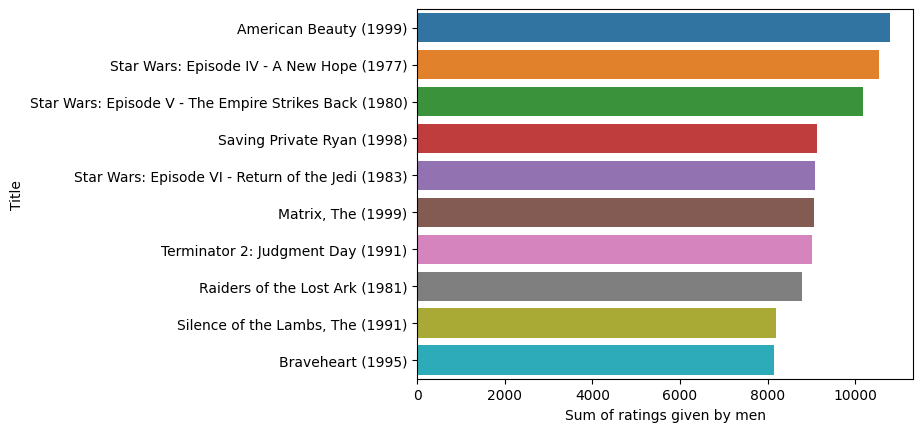

In [32]:
pl_M = sns.barplot(data=top10_for_M, y = top10_for_M.index, x = 'M')
pl_M.set_xlabel('Sum of ratings given by men')
pl_M.set_ylabel('Title')
print(pl_M)

AxesSubplot(0.125,0.11;0.775x0.77)


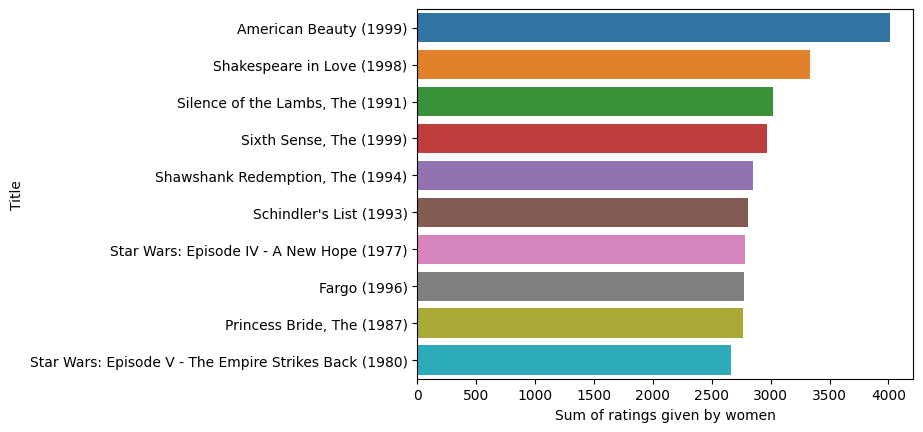

In [33]:
plF = sns.barplot(data=top10_for_F, y = top10_for_F.index, x='F')
plF.set(xlabel='Sum of ratings given by women', ylabel='Title')
print(plF)

[Text(0.5, 0, 'Sum of ratings given by women of age 1'), Text(0, 0.5, 'Title')]

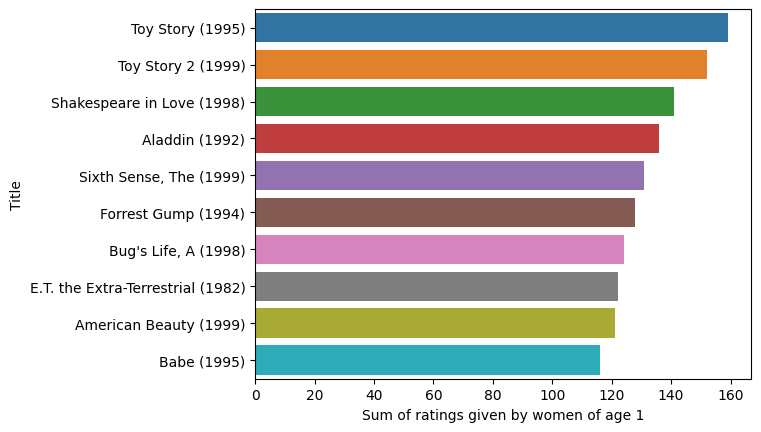

In [34]:
table=top10_by_age_and_gender[0]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 1'), Text(0, 0.5, 'Title')]

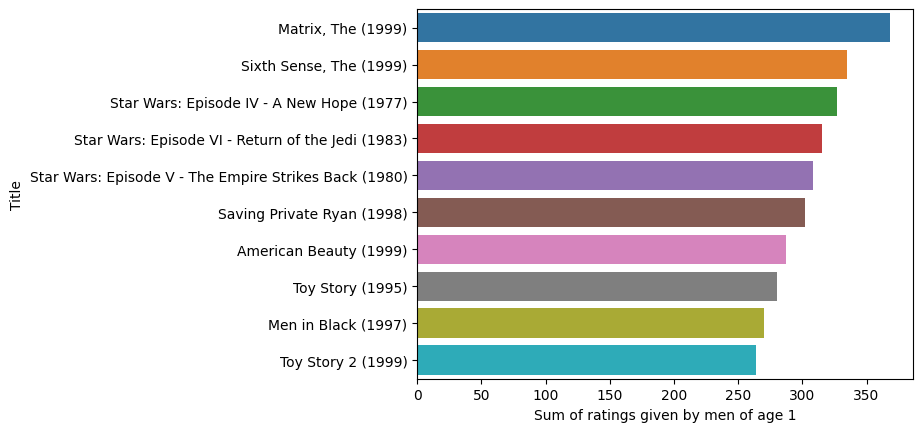

In [35]:
table=top10_by_age_and_gender[1]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 18'),
 Text(0, 0.5, 'Title')]

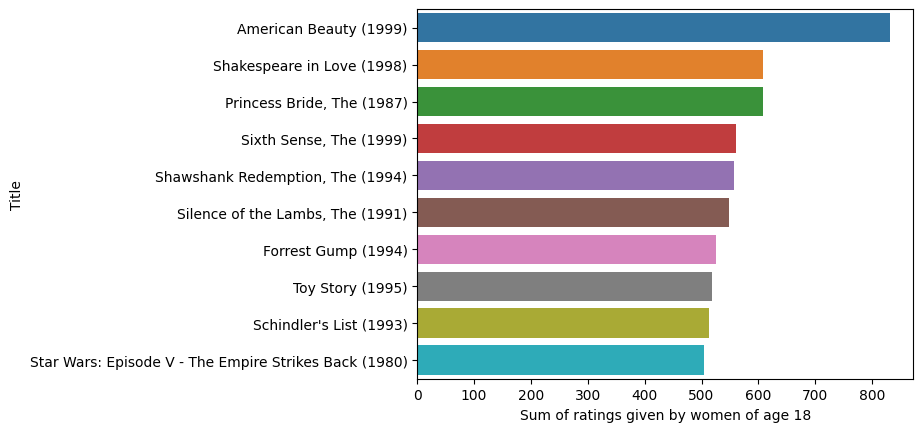

In [36]:
table=top10_by_age_and_gender[2]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 18'), Text(0, 0.5, 'Title')]

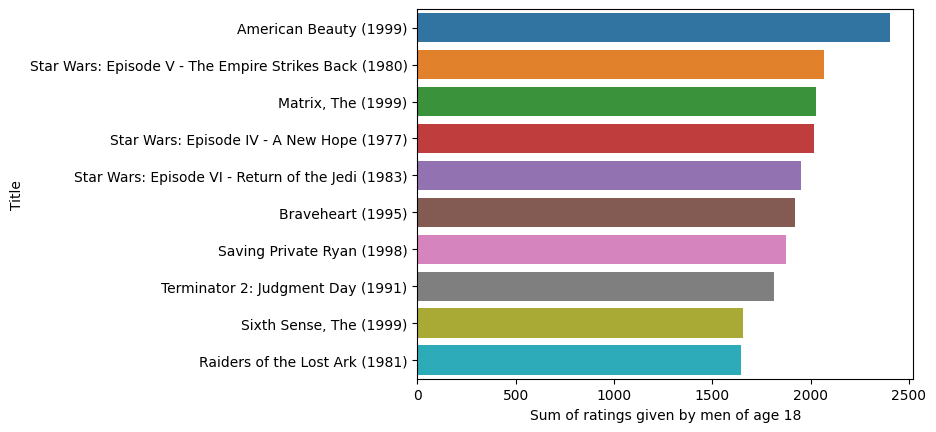

In [37]:
table=top10_by_age_and_gender[3]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 25'),
 Text(0, 0.5, 'Title')]

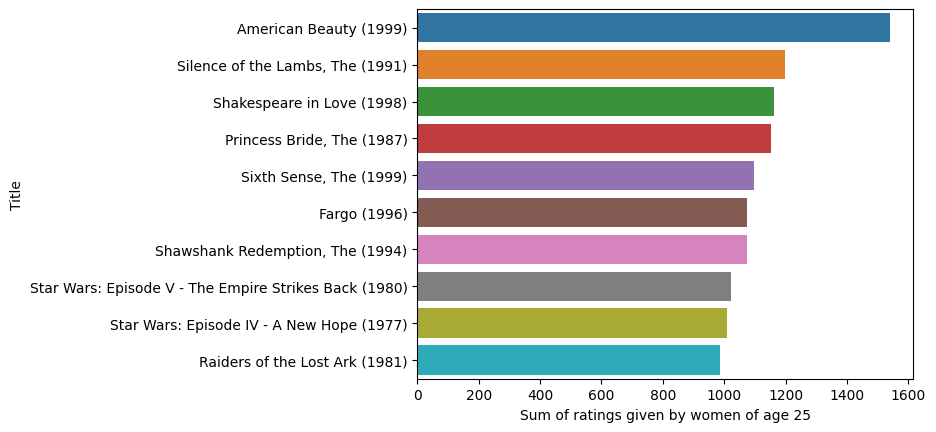

In [38]:
table=top10_by_age_and_gender[4]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 25'), Text(0, 0.5, 'Title')]

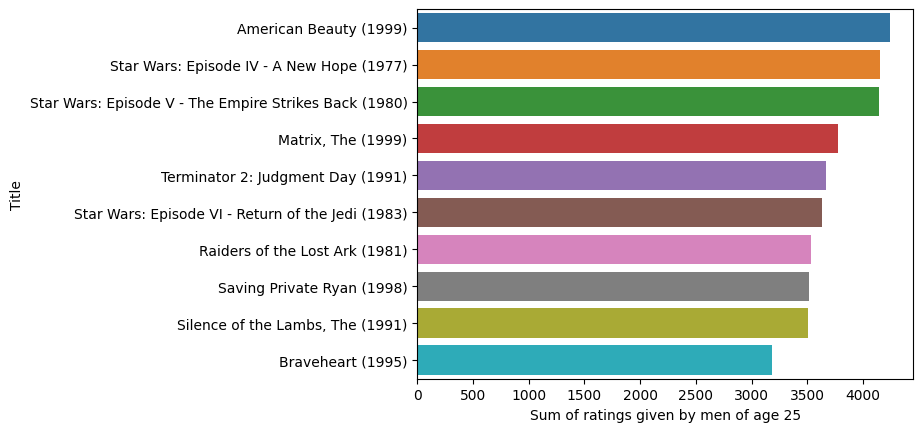

In [39]:
table=top10_by_age_and_gender[5]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 35'),
 Text(0, 0.5, 'Title')]

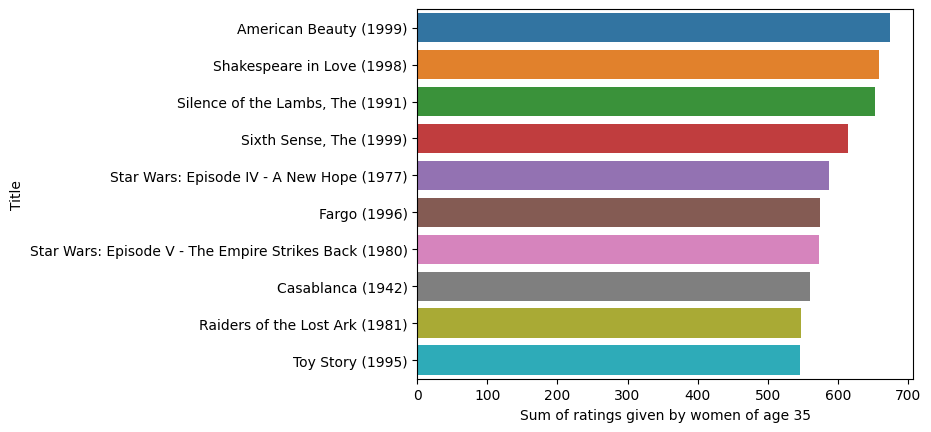

In [40]:
table=top10_by_age_and_gender[6]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 35'), Text(0, 0.5, 'Title')]

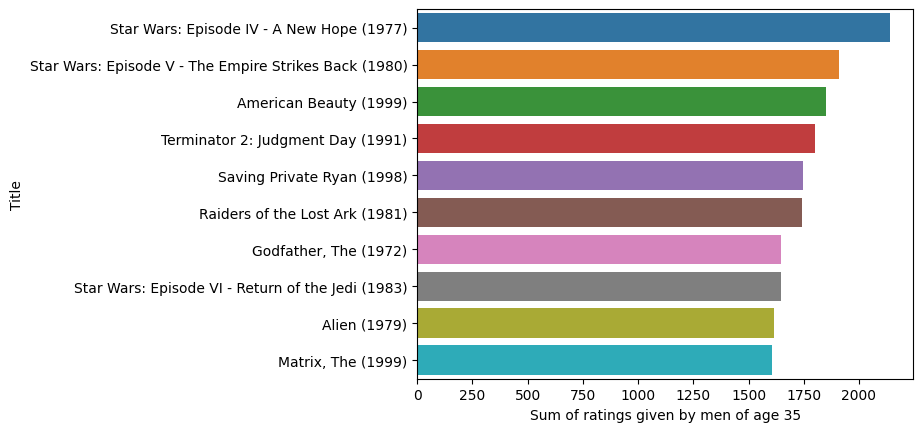

In [41]:
table=top10_by_age_and_gender[7]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 45'),
 Text(0, 0.5, 'Title')]

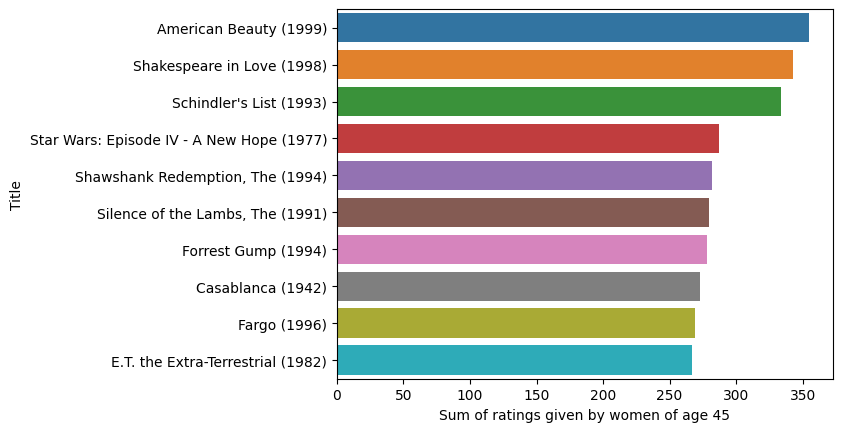

In [42]:
table=top10_by_age_and_gender[8]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')


[Text(0.5, 0, 'Sum of ratings given by men of age 45'), Text(0, 0.5, 'Title')]

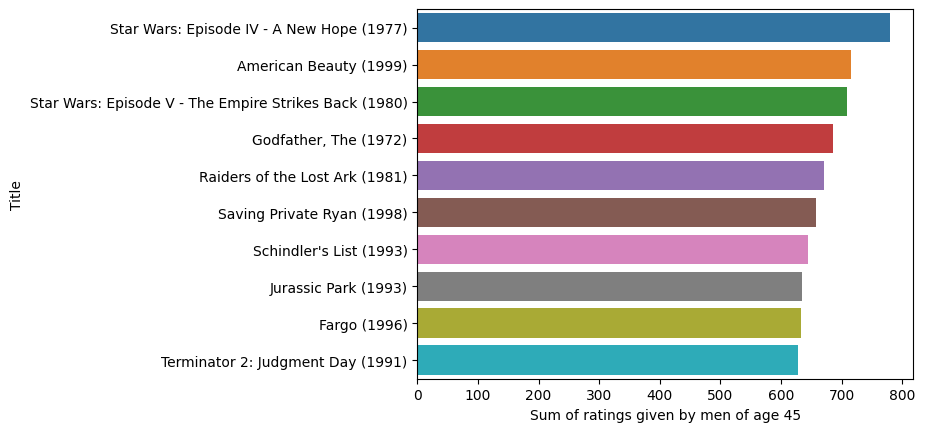

In [43]:
table=top10_by_age_and_gender[9]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 50'),
 Text(0, 0.5, 'Title')]

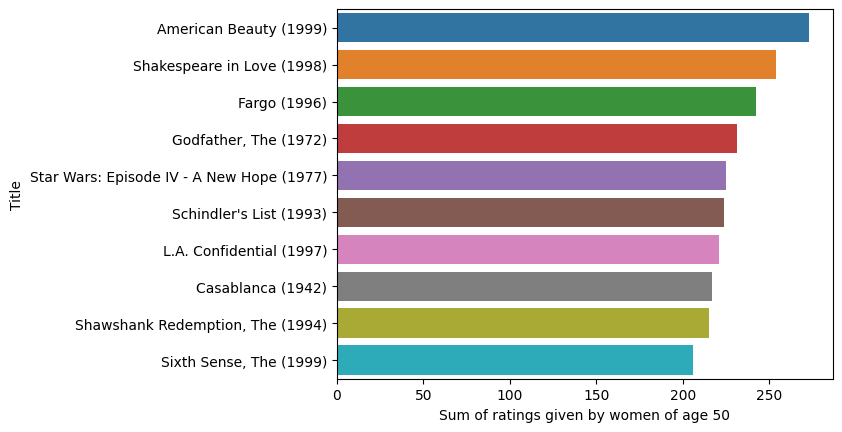

In [44]:
table=top10_by_age_and_gender[10]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 50'), Text(0, 0.5, 'Title')]

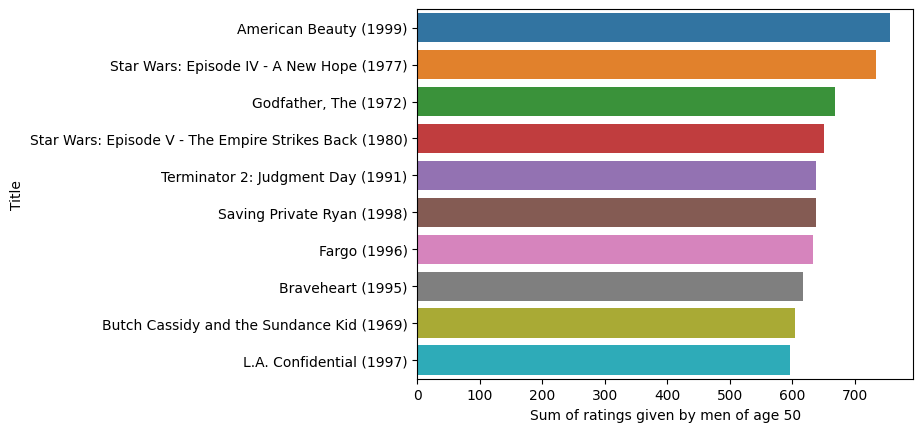

In [45]:
table=top10_by_age_and_gender[11]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by women of age 56'),
 Text(0, 0.5, 'Title')]

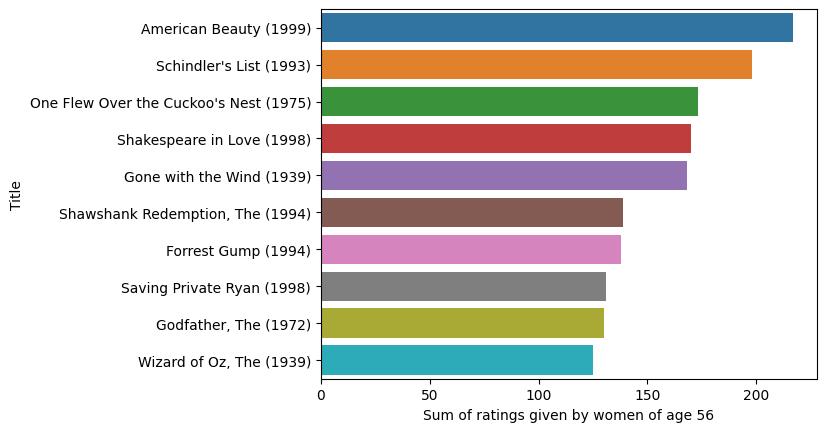

In [46]:
table=top10_by_age_and_gender[12]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}", ylabel = 'Title')

[Text(0.5, 0, 'Sum of ratings given by men of age 56'), Text(0, 0.5, 'Title')]

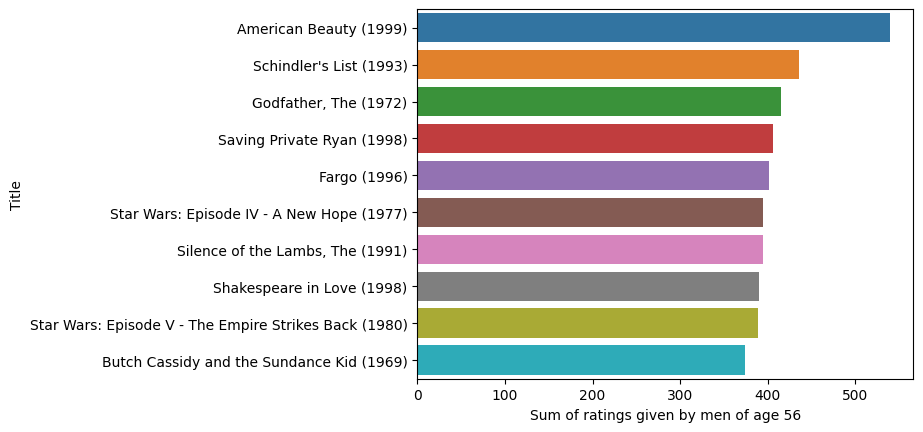

In [47]:
table=top10_by_age_and_gender[13]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"Sum of ratings given by {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",ylabel = 'Title')